In [1]:
import logging
import numpy as np
import pandas as pd
from arch import arch_model
from random import gauss
from random import seed
from matplotlib import pyplot as plt
import scipy.stats as sts

In [2]:
from rules_related import combine_rules_outputs
from whole_algorithm import train_model
from auxiliary import calc_log_returns
from multivariate_normal_distribution import LongMultivariateNormal
from model import FuzzyVolatilityModel

# Testing GARCH

## #1 increasing dispersion, increments are normal

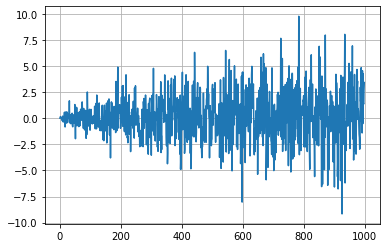

In [3]:
# create dataset
variance = np.arange(0, 10, .01)
# data = [gauss(0, var) for var in variance]
data = [sts.norm(0, var ** .5).rvs(1) for var in variance]

# plot
plt.plot(data)

plt.grid()
plt.show()

In [4]:
n_test = 100

train, test = data[:-n_test], data[-n_test:]

In [5]:
p = 1
q = 1

In [6]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [7]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 14921.485705887415
Iteration:      2,   Func. Count:     10,   Neg. LLF: 14921.948295910388
Iteration:      3,   Func. Count:     15,   Neg. LLF: 1870.05505042717
Iteration:      4,   Func. Count:     19,   Neg. LLF: 14921.58429686087
Iteration:      5,   Func. Count:     24,   Neg. LLF: 1954.3956894851658
Iteration:      6,   Func. Count:     29,   Neg. LLF: 1857.3188098183637
Iteration:      7,   Func. Count:     33,   Neg. LLF: 2248.064096550083
Iteration:      8,   Func. Count:     38,   Neg. LLF: 1851.8560353072658
Iteration:      9,   Func. Count:     43,   Neg. LLF: 1952.5875477478519
Iteration:     10,   Func. Count:     48,   Neg. LLF: 2006.47486493405
Iteration:     11,   Func. Count:     53,   Neg. LLF: 2069.714897795178
Iteration:     12,   Func. Count:     58,   Neg. LLF: 1971.1941389582084
Iteration:     13,   Func. Count:     63,   Neg. LLF: 1878.6919754754335
Iteration:     14,   Func. Count:     68,   Neg. LLF: 1850

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [8]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1836.05
Distribution:                  Normal   AIC:                           3678.10
Method:            Maximum Likelihood   BIC:                           3692.50
                                        No. Observations:                  900
Date:                Sat, Oct 30 2021   Df Residuals:                      900
Time:                        16:54:23   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.4

In [9]:
fitted.params

omega       0.009412
alpha[1]    0.002353
beta[1]     0.997660
Name: params, dtype: float64

In [10]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [11]:
forecast.residual_variance.values[0]

array([8.9678451 , 8.97737469, 8.98690441, 8.99643425, 9.00596422,
       9.01549431, 9.02502453, 9.03455487, 9.04408534, 9.05361593,
       9.06314665, 9.07267749, 9.08220846, 9.09173955, 9.10127077,
       9.11080211, 9.12033358, 9.12986518, 9.1393969 , 9.14892874,
       9.15846071, 9.1679928 , 9.17752502, 9.18705737, 9.19658984,
       9.20612243, 9.21565515, 9.22518799, 9.23472096, 9.24425406,
       9.25378728, 9.26332062, 9.2728541 , 9.28238769, 9.29192141,
       9.30145526, 9.31098923, 9.32052332, 9.33005755, 9.33959189,
       9.34912636, 9.35866096, 9.36819568, 9.37773053, 9.3872655 ,
       9.3968006 , 9.40633582, 9.41587117, 9.42540664, 9.43494224,
       9.44447796, 9.45401381, 9.46354978, 9.47308588, 9.4826221 ,
       9.49215845, 9.50169493, 9.51123153, 9.52076825, 9.5303051 ,
       9.53984207, 9.54937917, 9.5589164 , 9.56845375, 9.57799122,
       9.58752883, 9.59706655, 9.6066044 , 9.61614238, 9.62568048,
       9.63521871, 9.64475706, 9.65429553, 9.66383414, 9.67337

In [12]:
forecast.variance.values[0]

array([8.9678451 , 8.97737469, 8.98690441, 8.99643425, 9.00596422,
       9.01549431, 9.02502453, 9.03455487, 9.04408534, 9.05361593,
       9.06314665, 9.07267749, 9.08220846, 9.09173955, 9.10127077,
       9.11080211, 9.12033358, 9.12986518, 9.1393969 , 9.14892874,
       9.15846071, 9.1679928 , 9.17752502, 9.18705737, 9.19658984,
       9.20612243, 9.21565515, 9.22518799, 9.23472096, 9.24425406,
       9.25378728, 9.26332062, 9.2728541 , 9.28238769, 9.29192141,
       9.30145526, 9.31098923, 9.32052332, 9.33005755, 9.33959189,
       9.34912636, 9.35866096, 9.36819568, 9.37773053, 9.3872655 ,
       9.3968006 , 9.40633582, 9.41587117, 9.42540664, 9.43494224,
       9.44447796, 9.45401381, 9.46354978, 9.47308588, 9.4826221 ,
       9.49215845, 9.50169493, 9.51123153, 9.52076825, 9.5303051 ,
       9.53984207, 9.54937917, 9.5589164 , 9.56845375, 9.57799122,
       9.58752883, 9.59706655, 9.6066044 , 9.61614238, 9.62568048,
       9.63521871, 9.64475706, 9.65429553, 9.66383414, 9.67337

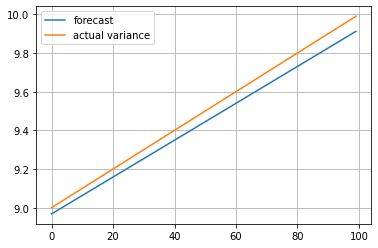

In [13]:
plt.plot(_, label='forecast')
plt.plot(variance[-n_test:], label='actual variance')

plt.legend()
plt.grid()
plt.show()

In [14]:
help(fitted.forecast)

Help on method forecast in module arch.univariate.base:

forecast(params: 'Optional[ArrayLike1D]' = None, horizon: 'int' = 1, start: 'Union[int, DateLike]' = None, align: "Literal['origin', 'target']" = 'origin', method: 'ForecastingMethod' = 'analytic', simulations: 'int' = 1000, rng: 'Optional[Callable[[Union[int, Tuple[int, ...]]], Float64Array]]' = None, random_state: 'Optional[np.random.RandomState]' = None, *, reindex: 'Optional[bool]' = None, x: 'Union[None, Dict[Label, ArrayLike], ArrayLike]' = None) -> 'ARCHModelForecast' method of arch.univariate.base.ARCHModelResult instance
    Construct forecasts from estimated model
    
    Parameters
    ----------
    params : ndarray, optional
        Alternative parameters to use.  If not provided, the parameters
        estimated when fitting the model are used.  Must be identical in
        shape to the parameters computed by fitting the model.
    horizon : int, optional
       Number of steps to forecast
    start : {int, datetim

## #2 white noise (Wiener process) 

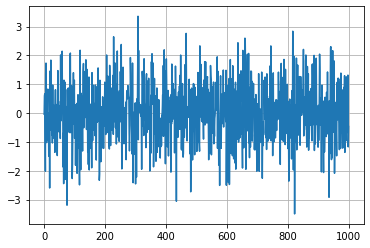

In [15]:
# create dataset
sample_size = 1000
mean = 0
variance = 1
# data = [sts.norm(0, var ** .5).rvs(1) for var in variance]
data = sts.norm(mean, variance ** .5).rvs(sample_size)

# plot
plt.plot(data)

plt.grid()
plt.show()

In [16]:
n_test = int(sample_size / 10)

train, test = data[:-n_test], data[-n_test:]

In [17]:
p = 1
q = 1

In [18]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [19]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3872.693454644822
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1294.8034361732384
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1296.566800423579
Iteration:      4,   Func. Count:     22,   Neg. LLF: 1294.8403823522553
Iteration:      5,   Func. Count:     27,   Neg. LLF: 1294.8024273244632
Iteration:      6,   Func. Count:     31,   Neg. LLF: 1295.0859151483537
Iteration:      7,   Func. Count:     36,   Neg. LLF: 1294.802344791928
Iteration:      8,   Func. Count:     40,   Neg. LLF: 1294.8023438514942
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1294.8023438514942
            Iterations: 8
            Function evaluations: 40
            Gradient evaluations: 8


In [20]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1294.80
Distribution:                  Normal   AIC:                           2595.60
Method:            Maximum Likelihood   BIC:                           2610.01
                                        No. Observations:                  900
Date:                Sat, Oct 30 2021   Df Residuals:                      900
Time:                        16:54:24   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         

In [21]:
fitted.params

omega       0.086736
alpha[1]    0.000000
beta[1]     0.916596
Name: params, dtype: float64

In [22]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [23]:
forecast_variance = forecast.variance.values[0]

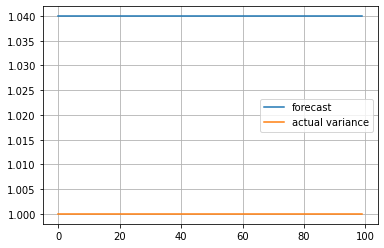

In [24]:
plt.plot(forecast_variance, label='forecast')
plt.plot([variance] * n_test, label='actual variance')

plt.legend()
plt.grid()
plt.show()

# Reading files

In [25]:
rtsi = pd.read_csv('files/RI.RTSI_790101_211016.csv', sep=',')

In [26]:
(rtsi['<TICKER>'] != 'RI.RTSI').any()

False

In [27]:
(rtsi['<TIME>'] != '00:00:00').any()

False

In [28]:
rtsi.drop(columns=['<PER>', '<TIME>', '<TICKER>'], inplace=True)

In [29]:
rtsi['<DATE>'] = pd.to_datetime(rtsi['<DATE>'], format='%Y%m%d')

In [30]:
rtsi.set_index('<DATE>', inplace=True)

In [31]:
rtsi['return'] = rtsi['<CLOSE>'].pct_change(1)

In [32]:
rtsi['log return'] = calc_log_returns(rtsi['<CLOSE>'])  # rtsi['<CLOSE>'].rolling(2).apply(lambda values: np.log(values[1] / values[0])).copy()

In [33]:
rtsi = rtsi.iloc[1:].copy()

In [34]:
rtsi.isna().any()

<OPEN>        False
<HIGH>        False
<LOW>         False
<CLOSE>       False
<VOL>         False
return        False
log return    False
dtype: bool

In [35]:
rtsi

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,return,log return
<DATE>,,,,,,,
2001-02-18,180.10,180.10,180.10,180.10,0,0.000000,0.000000
2001-02-19,180.10,181.21,176.67,177.29,0,-0.015602,-0.015725
2001-02-20,177.29,179.90,175.28,176.45,0,-0.004738,-0.004749
2001-02-21,176.45,176.45,161.12,162.39,0,-0.079683,-0.083037
2001-02-22,162.39,168.35,162.39,168.31,0,0.036455,0.035807
...,...,...,...,...,...,...,...
2021-10-11,1871.73,1883.71,1867.58,1882.43,1769145502,0.011537,0.011471
2021-10-12,1867.15,1876.79,1860.64,1869.94,1386130631,-0.006635,-0.006657
2021-10-13,1869.05,1869.05,1835.80,1855.11,1830447018,-0.007931,-0.007962


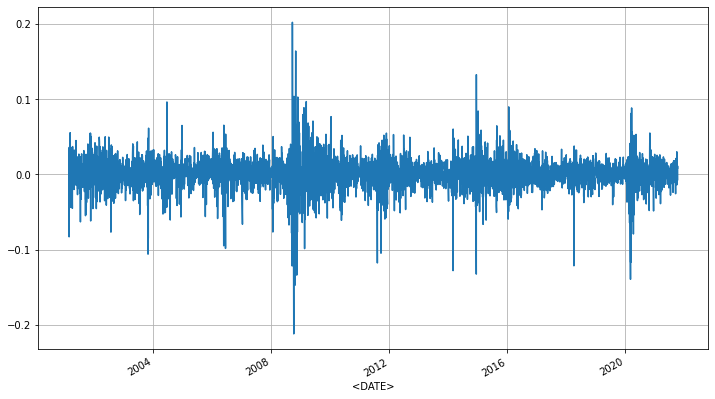

In [36]:
rtsi['log return'].plot(figsize=(12, 7))

plt.grid()
plt.show()

In [37]:
rtsi['log return'].describe()

count    5174.000000
mean        0.000455
std         0.020327
min        -0.211994
25%        -0.008822
50%         0.001318
75%         0.010414
max         0.202039
Name: log return, dtype: float64

# Testing `train`

In [38]:
logging.basicConfig(level=logging.DEBUG)

In [39]:
rescale_factor = 100

In [40]:
start_date = '2010-01-01'

In [41]:
input_data = rtsi['log return'].loc[start_date:].copy() * rescale_factor
clusterization_method = 'gaussian'
local_method = 'garch'
local_method_parameters = {'p': 1, 'q': 1, 'mean': 'Zero', 'dist': 'normal'}

In [42]:
n = input_data.shape[0]

In [43]:
mu = 0
sigma = .02 * rescale_factor

centers = np.array([[mu] * n])
cov_matrices = np.array([np.diag([sigma] * n, k=0)])

In [44]:
clusterization_parameters = {'centers': centers, 'cov_matrices': cov_matrices, 'n_clusters': 1}

In [45]:
train_model(input_data,
            clusterization_method=clusterization_method,
            clusterization_parameters=clusterization_parameters,
            local_method=local_method,
            local_method_parameters=local_method_parameters)

DEBUG:train_model:Starting clusterization
DEBUG:cluster_input:clustering method is gaussian
DEBUG:cluster_input:parameters is not None
INFO:calc_gaussian_membership_degrees:Starting
DEBUG:pdf:log_pdf = -6079.516519855979, type(log_pdf) = <class 'numpy.float64'>
DEBUG:pdf:long_log_pdf = -6079.516519855979, type(long_log_pdf) = <class 'numpy.float128'>
DEBUG:train_model:Clusterization completed
Estimated parameters: {'centers': array([[0, 0, 0, ..., 0, 0, 0]]), 'cov_matrices': array([[[2., 0., 0., ..., 0., 0., 0.],
        [0., 2., 0., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 2., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.],
        [0., 0., 0., ..., 0., 0., 2.]]]), 'n_clusters': 1}
Membership degrees:
[5.0063682e-2641]
DEBUG:train_model:Starting to run local model for each rule
DEBUG:apply_local_model:Method is GARCH
DEBUG:train_model:Local model runs for each rule are completed. rules_outputs: [[1.81711941]]
DEBUG:train_model:Sta

Iteration:      1,   Func. Count:      5,   Neg. LLF: 18208.402879687113
Iteration:      2,   Func. Count:     14,   Neg. LLF: 179841745.16303405
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6259.643369009693
Iteration:      4,   Func. Count:     26,   Neg. LLF: 5746.523881004245
Iteration:      5,   Func. Count:     31,   Neg. LLF: 5518.704480234793
Iteration:      6,   Func. Count:     35,   Neg. LLF: 5518.7020679092275
Iteration:      7,   Func. Count:     39,   Neg. LLF: 5518.701967731444
Iteration:      8,   Func. Count:     43,   Neg. LLF: 5518.7019340838815
Iteration:      9,   Func. Count:     46,   Neg. LLF: 5518.701934085554
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5518.7019340838815
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9


1.8171194100517129577

## Same data fed to GARCH(1, 1)

In [46]:
model = arch_model(input_data, mean=local_method_parameters['mean'], vol='GARCH', p=p, q=q,
                   dist=local_method_parameters['dist'])

In [47]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 18208.402879687113
Iteration:      2,   Func. Count:     14,   Neg. LLF: 179841745.16303405
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6259.643369009693
Iteration:      4,   Func. Count:     26,   Neg. LLF: 5746.523881004245
Iteration:      5,   Func. Count:     31,   Neg. LLF: 5518.704480234793
Iteration:      6,   Func. Count:     35,   Neg. LLF: 5518.7020679092275
Iteration:      7,   Func. Count:     39,   Neg. LLF: 5518.701967731444
Iteration:      8,   Func. Count:     43,   Neg. LLF: 5518.7019340838815
Iteration:      9,   Func. Count:     46,   Neg. LLF: 5518.701934085554
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5518.7019340838815
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9


In [48]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:             log return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5518.70
Distribution:                  Normal   AIC:                           11043.4
Method:            Maximum Likelihood   BIC:                           11061.4
                                        No. Observations:                 2965
Date:                Sat, Oct 30 2021   Df Residuals:                     2965
Time:                        16:54:29   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.

In [49]:
fitted.params

omega       0.059160
alpha[1]    0.081849
beta[1]     0.900093
Name: params, dtype: float64

In [50]:
forecast = fitted.forecast(reindex=False, horizon=1)

In [51]:
forecast_variance = forecast.variance.values[0]

In [52]:
forecast_variance

array([1.81711941])

# Testing `FuzzyVolatilityModel` class

In [53]:
fvm = FuzzyVolatilityModel(input_data,
                           clusterization_method=clusterization_method,
                           clusterization_parameters=clusterization_parameters,
                           local_method=local_method,
                           local_method_parameters=local_method_parameters)

INFO:model.FuzzyVolatilityModel:Creating an instance of FuzzyVolatilityModel


## `fit`

In [54]:
fvm.fit()

DEBUG:model.FuzzyVolatilityModel:Starting clusterization
DEBUG:cluster_input:clustering method is gaussian
DEBUG:cluster_input:parameters is not None
INFO:calc_gaussian_membership_degrees:Starting
DEBUG:pdf:log_pdf = -6079.516519855979, type(log_pdf) = <class 'numpy.float64'>
DEBUG:pdf:long_log_pdf = -6079.516519855979, type(long_log_pdf) = <class 'numpy.float128'>
DEBUG:model.FuzzyVolatilityModel:Clusterization completed
Estimated parameters: {'centers': array([[0, 0, 0, ..., 0, 0, 0]]), 'cov_matrices': array([[[2., 0., 0., ..., 0., 0., 0.],
        [0., 2., 0., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 2., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.],
        [0., 0., 0., ..., 0., 0., 2.]]]), 'n_clusters': 1}
Membership degrees:
[5.0063682e-2641]
DEBUG:model.FuzzyVolatilityModel:Starting to run local model for each rule
DEBUG:apply_local_model:Method is GARCH
DEBUG:model.FuzzyVolatilityModel:Local model runs for each rule are co

Iteration:      1,   Func. Count:      5,   Neg. LLF: 18208.402879687113
Iteration:      2,   Func. Count:     14,   Neg. LLF: 179841745.16303405
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6259.643369009693
Iteration:      4,   Func. Count:     26,   Neg. LLF: 5746.523881004245
Iteration:      5,   Func. Count:     31,   Neg. LLF: 5518.704480234793
Iteration:      6,   Func. Count:     35,   Neg. LLF: 5518.7020679092275
Iteration:      7,   Func. Count:     39,   Neg. LLF: 5518.701967731444
Iteration:      8,   Func. Count:     43,   Neg. LLF: 5518.7019340838815
Iteration:      9,   Func. Count:     46,   Neg. LLF: 5518.701934085554
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5518.7019340838815
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9


In [55]:
fvm.current_output

1.8171194100517129577